<a href="https://colab.research.google.com/github/angshumansinha/Computer-Vision-Basics/blob/main/Image_Color_Removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"ImaGE---------------> gREY sCALE by reducing color channels to 1 making the image a 2d numpy vector------------> using Adaptive thresholding technique to convert to BW"

'ImaGE---------------> gREY sCALE by reducing color channels to 1 making the image a 2d numpy vector------------> using Adaptive thresholding technique to convert to BW'

(4000, 3000, 3)


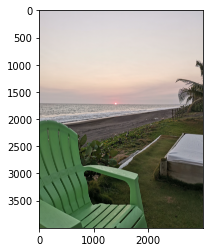

In [2]:
#Let' see an example
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=plt.imread("/content/sunset.jpg")
plt.imshow(img)
print(np.shape(img))

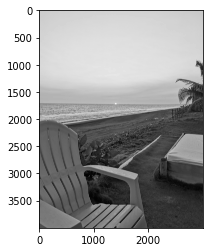

In [3]:
#let's convert to greyscale
#solution dot product of matrix with weight vector
# Use the weights we used before:
#                              Red: 0.299
#                            Green: 0.587
#                             Blue: 0.114
img_grey=np.dot(img[...,:3],[0.299,0.587,0.114])
plt.imshow(img_grey,cmap="gray")

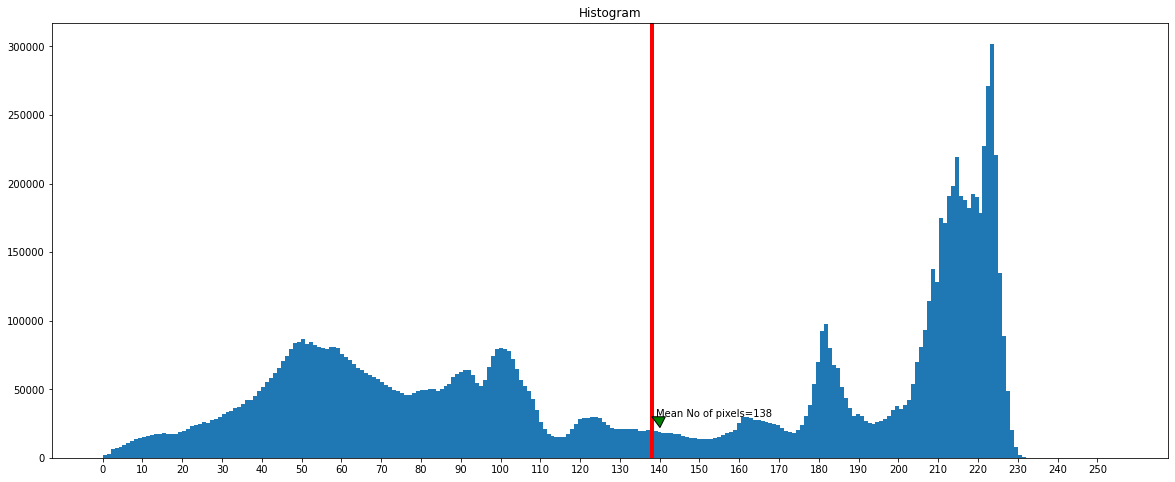

In [4]:
#histogram of grayscale image pixels distribution
plt.figure(figsize=(20,8))
plt.hist(img_grey.ravel(),256,[0,255]) #creates a flattened array and then plots
plt.axvline(x=np.nanmean(img_grey.ravel()),linewidth=4, color='r')
plt.annotate('Mean No of pixels=138', xy =(138, 30000),
                xytext =(139, 30000), 
                arrowprops = dict(facecolor ='green',
                                  shrink = 0.05),)
plt.title('Histogram')
plt.xticks(np.arange(0, 255, 10))
plt.show()

In [6]:
img_grey.ravel()

array([196.25 , 197.25 , 197.25 , ...,  55.373,  57.145,  55.145])

In [7]:
#let's create a simple algorithm that illustrates this greyscale to BW conversion
"""
if pixel_val>threshold, assign white(255) else assign black(0)
"""
def grayscale_BW(img,threshold):
  rows,cols=np.shape(img)
  #zero matrix
  BW_img=np.zeros((rows,cols))
  for i in range(rows):
    for j in range(cols):
      BW_img[i,j]=0 if img[i,j]<=threshold else 255
  return BW_img


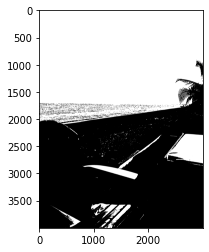

In [8]:
plt.imshow(grayscale_BW(img_grey,138),cmap='gray')

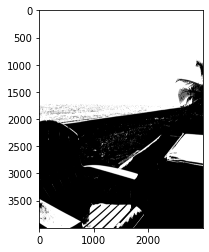

In [9]:
plt.imshow(grayscale_BW(img_grey,118),cmap='gray')

In [14]:
from matplotlib import rcParams

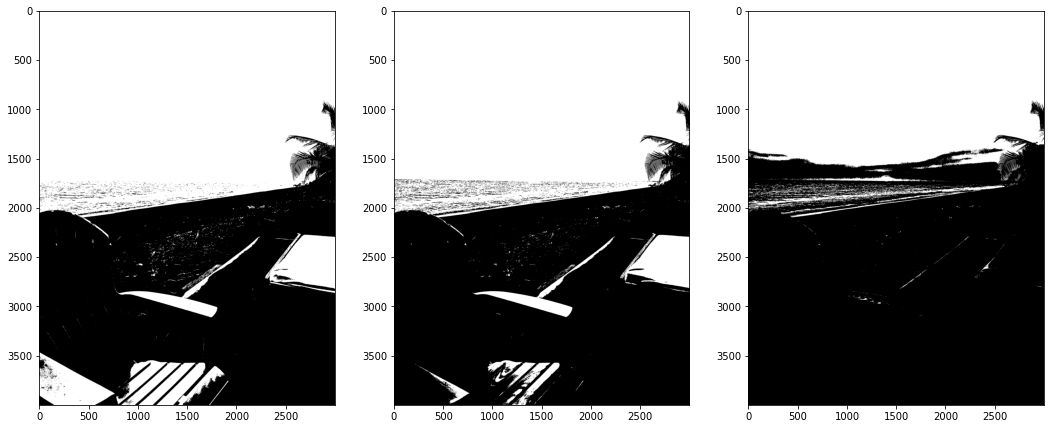

In [15]:
rcParams['figure.figsize'] = 18,8
fig,ax=plt.subplots(1,3)
ax[0].imshow(grayscale_BW(img_grey,118),cmap='gray')
ax[1].imshow(grayscale_BW(img_grey,138),cmap='gray')
ax[2].imshow(grayscale_BW(img_grey,185),cmap='gray')

(675, 1200, 3)


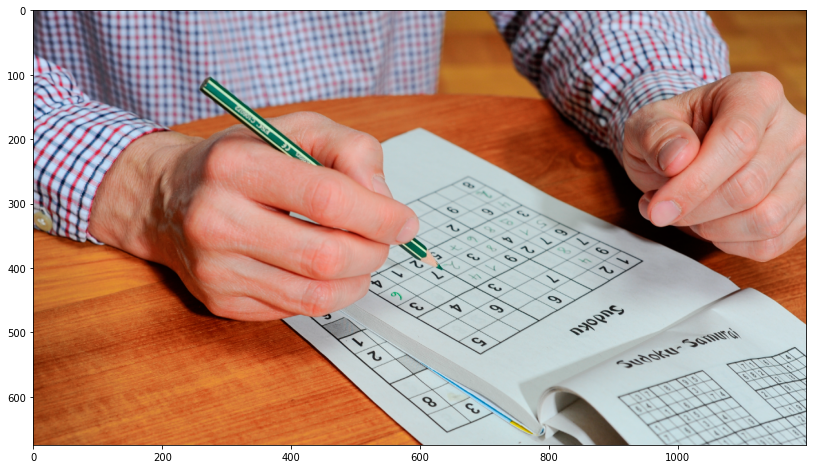

In [18]:
sudoku_img=plt.imread("/content/Sudoku-Hints.png")
plt.imshow(sudoku_img)
print(np.shape(sudoku_img))

In [21]:
def adapt_PNG(the_PNG):
    the_PNG = the_PNG[:,:,:3]      # Step 1
    the_PNG = the_PNG * 255        # Step 2
    the_PNG = adapt_image(the_PNG) # Steps 3, 4, 5
    return the_PNG


# This function will be useful to perform steps 3, 4, and 5 for images
# undergoing operations that may result in floating point numbers. 
def adapt_image(the_img):
    return np.uint8(np.clip(the_img.round(),0,255)) # Steps 3, 4, 5

In [20]:
print(sudoku_img[0:5]) # lets multiply with 255

[[[0.24313726 0.23921569 0.2627451 ]
  [0.2784314  0.26666668 0.3019608 ]
  [0.29803923 0.2627451  0.30588236]
  ...
  [0.43137255 0.23137255 0.05098039]
  [0.44313726 0.22352941 0.0627451 ]
  [0.44313726 0.23137255 0.06666667]]

 [[0.24705882 0.23529412 0.27058825]
  [0.27450982 0.2627451  0.29803923]
  [0.29411766 0.25490198 0.30588236]
  ...
  [0.44313726 0.23921569 0.05882353]
  [0.44313726 0.23137255 0.06666667]
  [0.4509804  0.23921569 0.07058824]]

 [[0.24313726 0.23137255 0.27058825]
  [0.26666668 0.2509804  0.29411766]
  [0.28627452 0.2509804  0.3019608 ]
  ...
  [0.44313726 0.23921569 0.05882353]
  [0.44705883 0.23137255 0.06666667]
  [0.45882353 0.23529412 0.07843138]]

 [[0.24313726 0.23921569 0.2784314 ]
  [0.2627451  0.24705882 0.3019608 ]
  [0.2627451  0.23921569 0.2901961 ]
  ...
  [0.4627451  0.24313726 0.07450981]
  [0.4627451  0.23921569 0.07843138]
  [0.47058824 0.24313726 0.08235294]]

 [[0.2509804  0.23921569 0.2784314 ]
  [0.2627451  0.24705882 0.29411766]
  [0.2

In [22]:
sud_img=adapt_PNG(sudoku_img)
print(np.shape(sud_img))

(675, 1200, 3)


(array([1.3315e+04, 1.5730e+04, 4.7390e+03, 4.0750e+03, 5.0790e+03,
        4.3580e+03, 4.7470e+03, 3.5910e+03, 2.3940e+03, 3.2880e+03,
        3.1620e+03, 2.6500e+03, 3.0150e+03, 2.9410e+03, 2.8790e+03,
        2.1220e+03, 2.7860e+03, 3.0660e+03, 3.0970e+03, 2.8550e+03,
        3.3420e+03, 2.2310e+03, 3.5300e+03, 3.3900e+03, 4.0990e+03,
        4.2310e+03, 4.7660e+03, 5.1910e+03, 5.7420e+03, 4.9820e+03,
        6.6690e+03, 6.5440e+03, 7.5440e+03, 7.1310e+03, 7.4870e+03,
        7.1770e+03, 7.0460e+03, 5.2880e+03, 7.6890e+03, 8.0000e+03,
        7.7550e+03, 7.9270e+03, 7.7660e+03, 6.8400e+03, 7.4530e+03,
        7.6530e+03, 8.1840e+03, 6.9270e+03, 9.2330e+03, 9.8270e+03,
        1.0426e+04, 1.0519e+04, 1.0160e+04, 9.0550e+03, 8.3630e+03,
        7.0060e+03, 5.8630e+03, 4.9410e+03, 2.2780e+03, 4.2130e+03,
        4.1420e+03, 4.0890e+03, 4.1970e+03, 4.0990e+03, 4.2260e+03,
        4.4290e+03, 4.3440e+03, 4.5700e+03, 4.8630e+03, 4.9530e+03,
        5.0750e+03, 5.2390e+03, 2.1910e+03, 5.05

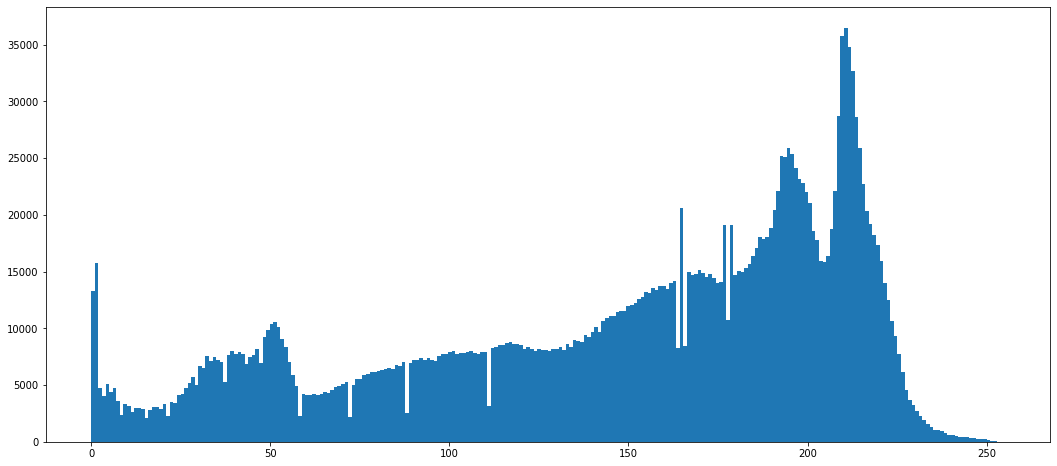

In [23]:
plt.hist(sud_img.ravel(),256,[0,255])

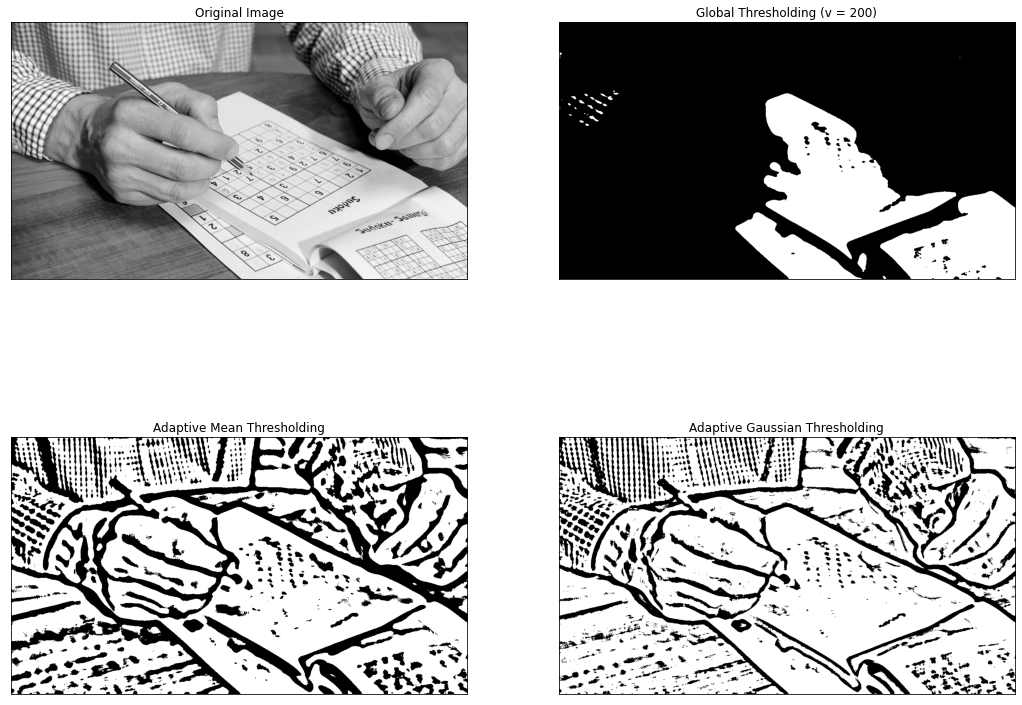

In [25]:
#lets use opencv for a faster execution and a different image
# threshold methods are used: 
#                     - Adaptive Mean Thresholding
#                     - Adaptive Gaussian Thresholding
rcParams['figure.figsize'] = (18,14)
threshold = 200 # Also try it with 215 and 225
#img0 = cv2.imread('/content/sunset.jpg',0)
img = cv2.cvtColor(sud_img, cv2.COLOR_BGR2GRAY)
img1 = cv2.medianBlur(img,17)
ret,th1 = cv2.threshold(img1,threshold,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img1,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,33,2)
th3 = cv2.adaptiveThreshold(img1,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,33,2)
titles = ['Original Image', 'Global Thresholding (v = '+str(threshold)+')',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()